Link of deployed app: https://car-price-predictor-av.herokuapp.com/

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [5]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [6]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [7]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [8]:
df['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
df2 = df.drop(columns=['Car_Name'])
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
df2['Current_Year'] = 2020
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [13]:
df2['Car_Age'] = df2['Current_Year'] - df2['Year']
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [14]:
df2.drop(columns=['Current_Year', 'Year'], inplace=True)
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [15]:
df2 = pd.get_dummies(df2, drop_first=True)
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

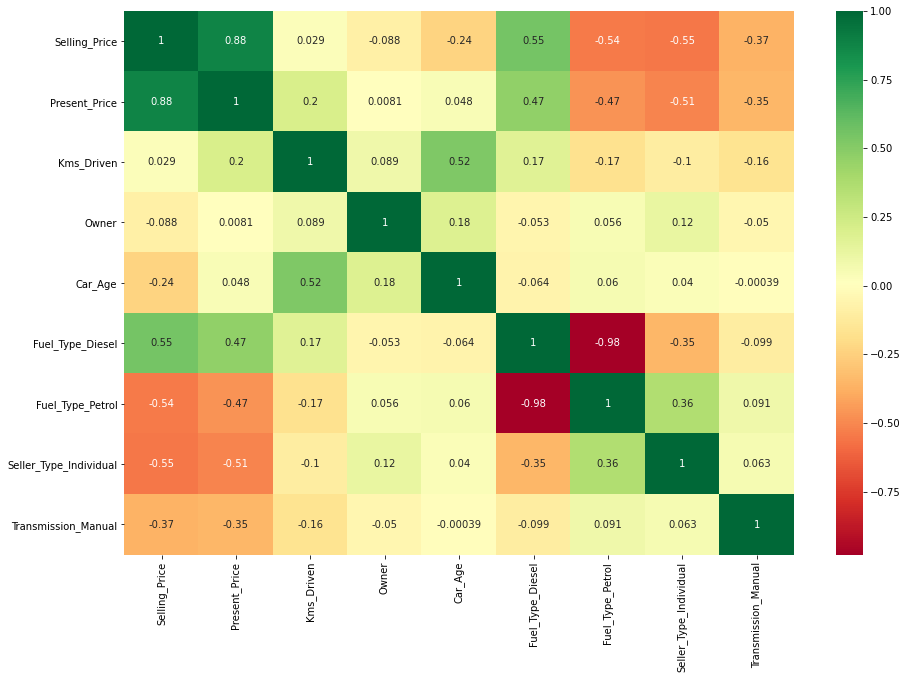

In [17]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True, cmap='RdYlGn')

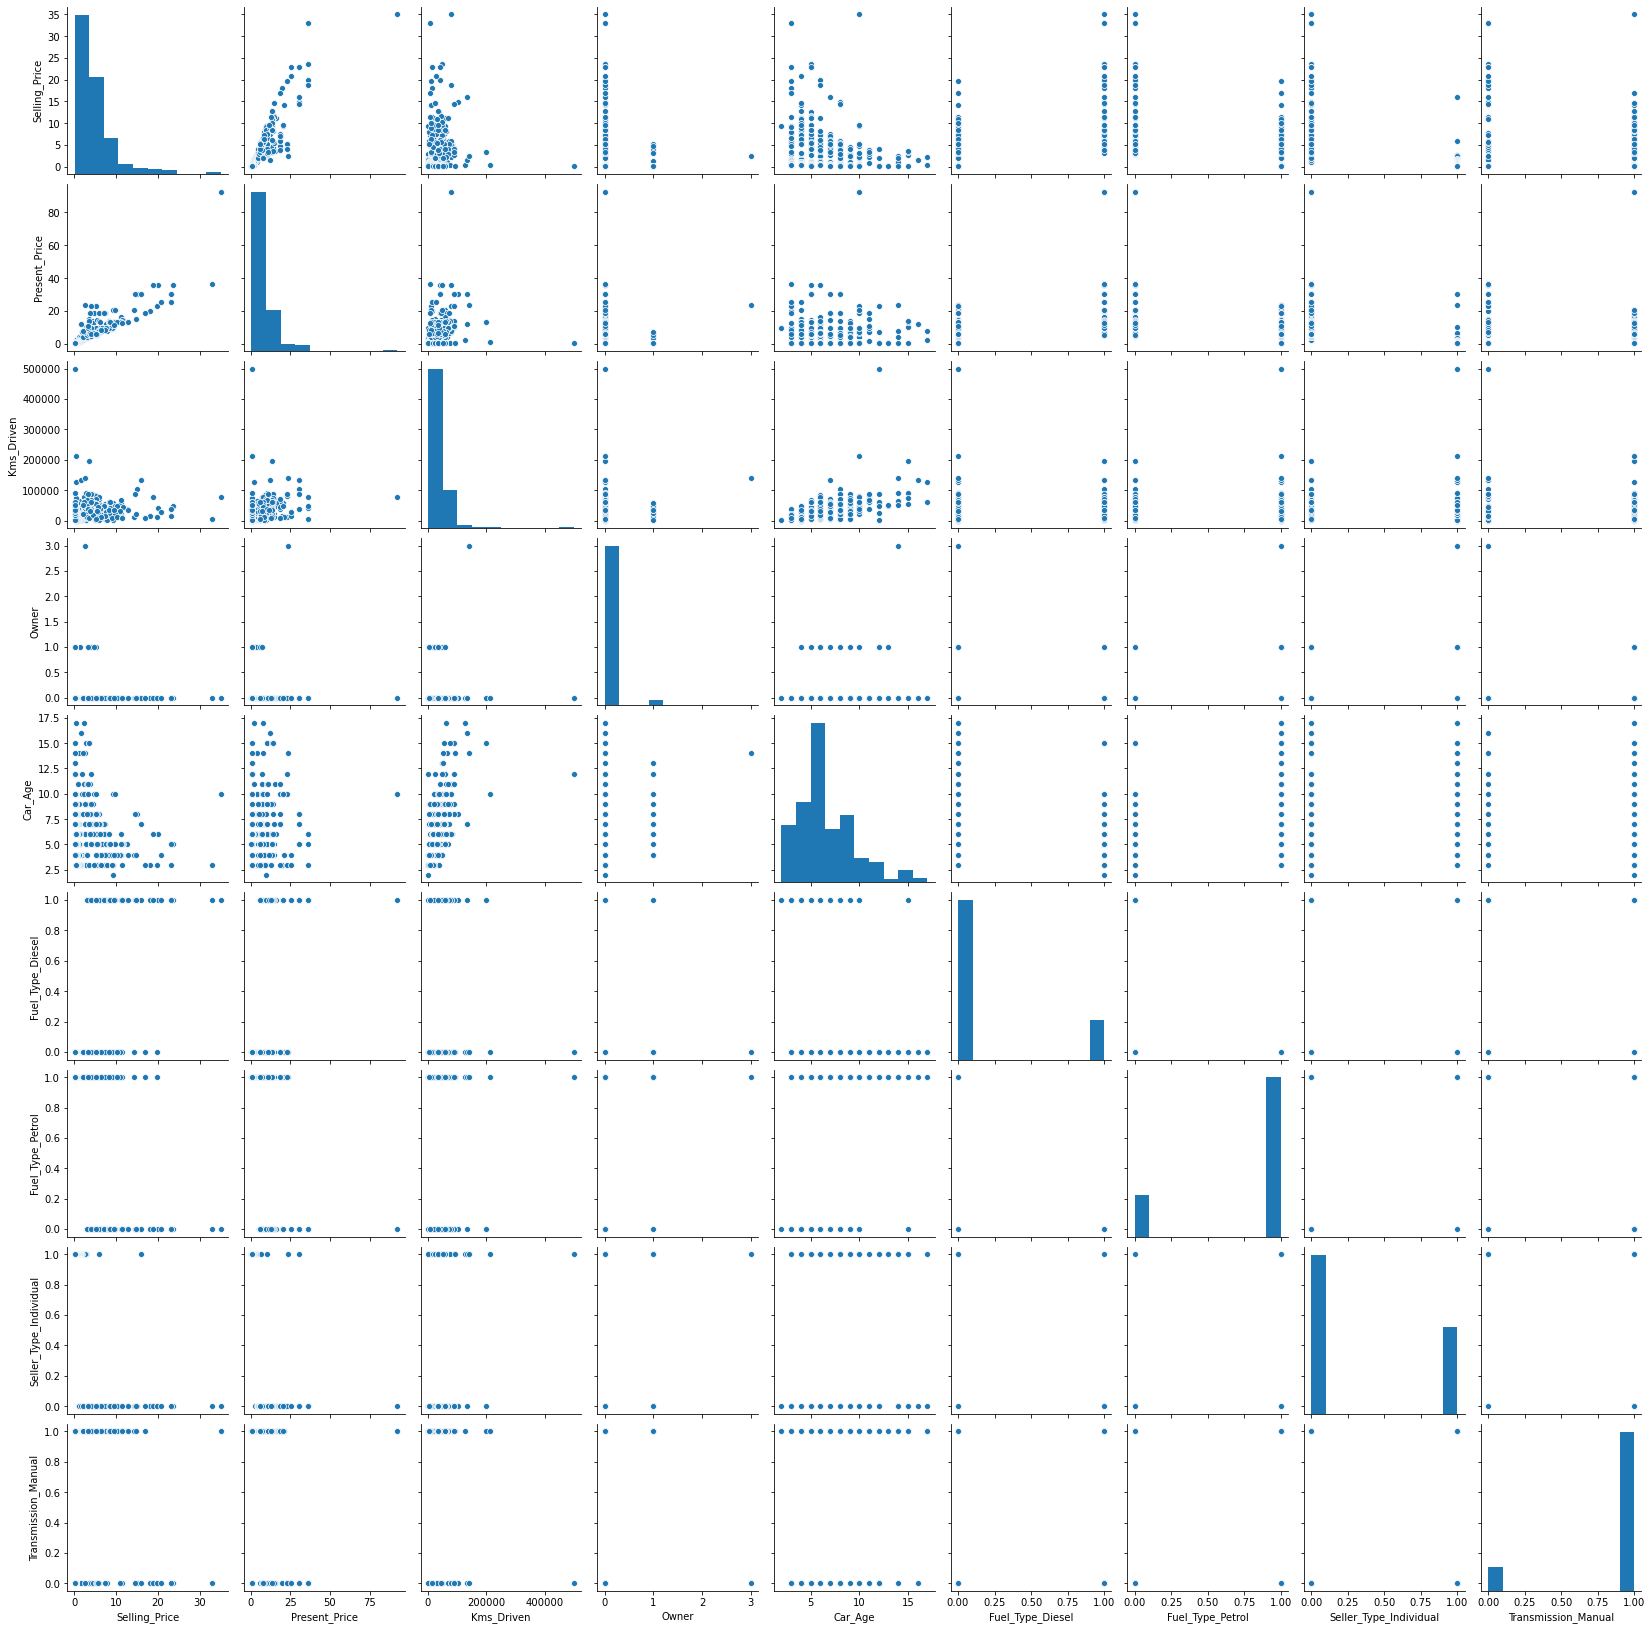

In [18]:
sns.pairplot(df2)

In [19]:
X = df2.drop(columns=['Selling_Price'])
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [20]:
y = df2['Selling_Price']
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [22]:
print(model.feature_importances_)

[0.40898645 0.04075615 0.0007351  0.07544441 0.20585049 0.01499538
 0.12785185 0.12538016]


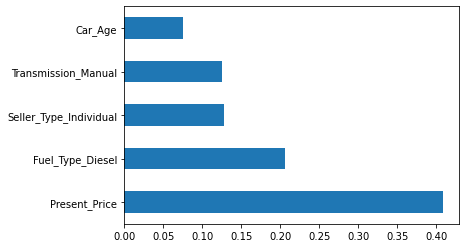

In [23]:
f_imp = pd.Series(model.feature_importances_, index=X.columns)
f_imp.nlargest(5).plot(kind='barh')

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
74,8.93,83000,0,6,1,0,0,1
239,4.43,23709,0,8,0,1,0,1
64,36.23,6000,0,3,1,0,0,0
294,6.80,33019,0,6,0,1,0,1
286,7.90,28569,0,4,0,1,0,1


In [25]:
y_train.head()

74      4.90
239     2.00
64     33.00
294     3.75
286     5.65
Name: Selling_Price, dtype: float64

In [26]:
X_test.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
223,9.400,61381,0,5,1,0,0,1
150,0.826,6000,0,9,0,1,1,1
226,5.700,24678,0,5,0,1,0,1
296,11.600,33988,0,4,1,0,0,1
52,19.770,15000,0,3,1,0,0,0


In [27]:
y_test.head()

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
Name: Selling_Price, dtype: float64

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [29]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop=1200, num=12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [30]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [31]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [32]:
from sklearn.model_selection import RandomizedSearchCV

rfr_rcv = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = -1)

In [33]:
rfr_rcv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [34]:
y_preds = rfr_rcv.predict(X_test)
y_preds

array([ 6.99807635,  0.518558  ,  4.97207944,  8.30320136, 12.30960686,
        5.26691321,  3.34590982,  0.42823906,  3.92414392,  4.96697753,
        2.84787428,  0.65849325,  5.13641377,  7.21205788,  7.40635079,
       12.49415608,  7.00704565,  4.19858895,  0.48246839,  1.30987853,
        3.23639288,  5.20610548,  5.36191571, 10.49084588,  0.23415755,
        0.68206277,  0.33693046,  0.68467653,  0.50551496,  4.81284804,
        2.83532083,  5.89637858,  0.51484385,  7.1200794 ,  3.27608114,
        1.14538891,  5.71783973,  5.43966013,  0.24984226,  7.71411644,
        7.58728936, 21.99519754,  5.06895209,  4.50801681,  5.62168796,
       10.38601018,  0.25096261,  0.76063644,  5.36687577,  6.81853035,
        6.72230567,  2.96646027,  5.27346989, 22.00243553,  1.14404557,
        1.14189055,  0.41625439,  2.75977168,  3.6482349 ,  2.5322964 ,
        4.60854909])

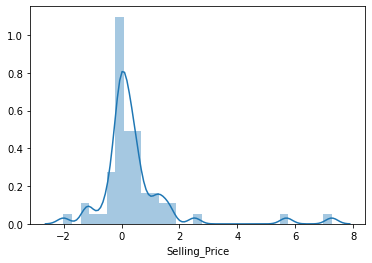

In [35]:
sns.distplot(y_test - y_preds)

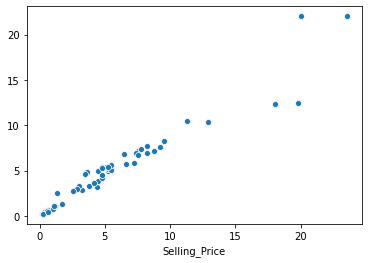

In [36]:
sns.scatterplot(y_test, y_preds)

In [37]:
import pickle
file = open('RFR_model.pkl', 'wb')
pickle.dump(rfr_rcv, file)